# Avaliação de ISGD contínuo em holdouts - Palco 2010

Experimentos para melhorar desempenho:

* EXPERIMENTAR COM # DE CHECKPOINTS (10, 20, 30?)
* EXPERIMENTAR COM 30 ou 50 recomendações

In [1]:
import os
import sys
sys.path.append(os.path.abspath('') + '/..')

In [2]:
from data import ImplicitData
import pandas as pd 
import numpy as np 
from recommenders_implicit import ISGD  # ISGD framework, BISGD,
from eval_implicit import EvaluateAndStore # EvaluateAndStore para guardar estados do modelo e holdouts, a avaliação prequencial de ratings implicitos é opcional, , EvalHoldout
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [3]:
# importa dataset 'palco playlists'
data = pd.read_csv("../datasets/palco_2010.tsv","\t")

# transforma interações em objeto que contem mappings usuário-itens e item-usuários, contém também métodos de suporte.
# recebe listas
# stream = ImplicitData(data['user_id'].to_list(), data['track_id'].to_list())
stream = ImplicitData(data['user_id'], data['track_id'])

empty_stream = ImplicitData([], [])

In [4]:
num_factors = 200
num_iter = 6
learn_rate = 0.35
regularization = 0.5
num_nodes = 8

___
TREINO COM PALCO_2010 - 10 CHECKPOINTS, 20 Recommendations

In [5]:
# O modelo não pode conter o stream, deve ser iniciado com uma lista vazia
# Se o stream for passado, ao excluir itens conhecidos o recall é sempre 0. Ao permitir a recomendação de itens já vistos, o recall não é 0.
model = ISGD(empty_stream, num_factors, num_iter, learn_rate = learn_rate, u_regularization = regularization, i_regularization = regularization, random_seed = 10)

In [6]:
eval = EvaluateAndStore(model=model,data=stream,n_holdouts=10, metrics = ["Recall@N"], N_recommendations=20)

In [7]:
results=eval.EvaluateAndStore(start_eval=0, count=stream.size, store_only=True)

A seguir calculamos uma matrix de resultados - todos os checkpoints de modelo avaliados em todos os holdouts.
Exclude known items está LIGADO.

In [8]:
eval.EvaluateHoldouts(exclude_known_items=True)

In [9]:
rm1 = eval.results_matrix
df = pd.DataFrame(rm1)
df.to_csv('output/palco_2010-10_cp-results_matrix.csv', index=False)

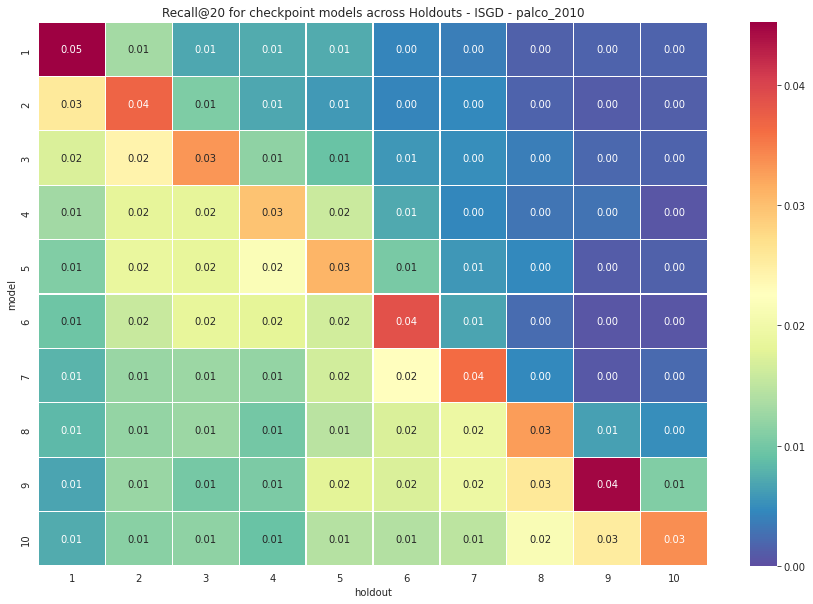

In [14]:
plt.figure(figsize=(15, 10))
x_t = np.arange(0,rm1.shape[0])
labels=[str(i+1) for i in x_t]
sns.heatmap(rm1.T, vmin=0, vmax=rm1.max().max(), annot=True, fmt='0.2f', linewidths=.1, cmap='Spectral_r', xticklabels=labels, yticklabels=labels)
plt.ylabel('model')
plt.xlabel('holdout')
plt.title('Recall@20 for checkpoint models across Holdouts - ISGD - palco_2010');
# plt.savefig('output/recall20 heatmap palco_2010');

___
TREINO COM PALCO_2010 - 30 CHECKPOINTS, 20 Recommendations

In [19]:
# O modelo não pode conter o stream, deve ser iniciado com uma lista vazia
# Se o stream for passado, ao excluir itens conhecidos o recall é sempre 0. Ao permitir a recomendação de itens já vistos, o recall não é 0.
model = ISGD(empty_stream, num_factors, num_iter, learn_rate = learn_rate, u_regularization = regularization, i_regularization = regularization, random_seed = 10)

In [20]:
eval = EvaluateAndStore(model=model,data=stream,n_holdouts=30, metrics = ["Recall@N"], N_recommendations=20)

In [21]:
results=eval.EvaluateAndStore(start_eval=0, count=stream.size, store_only=True)

A seguir calculamos uma matrix de resultados - todos os checkpoints de modelo avaliados em todos os holdouts.
Exclude known items está LIGADO.

In [22]:
eval.EvaluateHoldouts(exclude_known_items=True)

In [23]:
rm2 = eval.results_matrix
df2 = pd.DataFrame(rm2)
df2.to_csv('output/palco_2010-30_cp-results_matrix.csv', index=False)

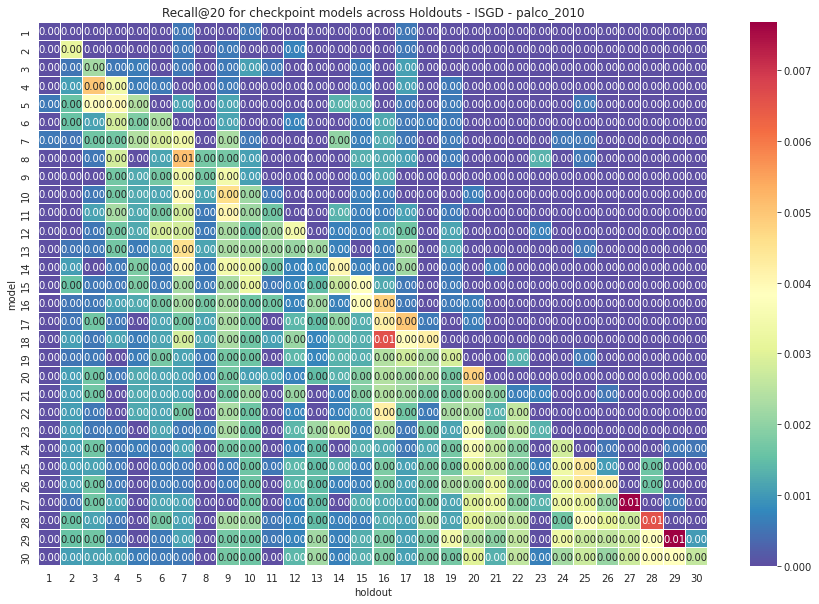

In [25]:
plt.figure(figsize=(15, 10))
x_t = np.arange(0,rm2.shape[0])
labels=[str(i+1) for i in x_t]
sns.heatmap(rm2.T, vmin=0, vmax=rm2.max().max(), annot=True, fmt='0.2f', linewidths=.1, cmap='Spectral_r', xticklabels=labels, yticklabels=labels)
plt.ylabel('model')
plt.xlabel('holdout')
plt.title('Recall@20 for checkpoint models across Holdouts - ISGD - palco_2010');
# plt.savefig('output/recall20 heatmap palco_2010');

___
TREINO COM PALCO_2010 - 20 CHECKPOINTS, 30 Recommendations

In [5]:
# O modelo não pode conter o stream, deve ser iniciado com uma lista vazia
# Se o stream for passado, ao excluir itens conhecidos o recall é sempre 0. Ao permitir a recomendação de itens já vistos, o recall não é 0.
model = ISGD(empty_stream, num_factors, num_iter, learn_rate = learn_rate, u_regularization = regularization, i_regularization = regularization, random_seed = 10)

In [6]:
eval = EvaluateAndStore(model=model,data=stream,n_holdouts=20, metrics = ["Recall@N"], N_recommendations=30)

In [7]:
results=eval.EvaluateAndStore(start_eval=0, count=stream.size, store_only=True)

A seguir calculamos uma matrix de resultados - todos os checkpoints de modelo avaliados em todos os holdouts.
Exclude known items está LIGADO.

In [8]:
eval.EvaluateHoldouts(exclude_known_items=True)

In [9]:
rm3 = eval.results_matrix
df3 = pd.DataFrame(rm3)
df3.to_csv('output/palco_2010-30_recs-results_matrix.csv', index=False)

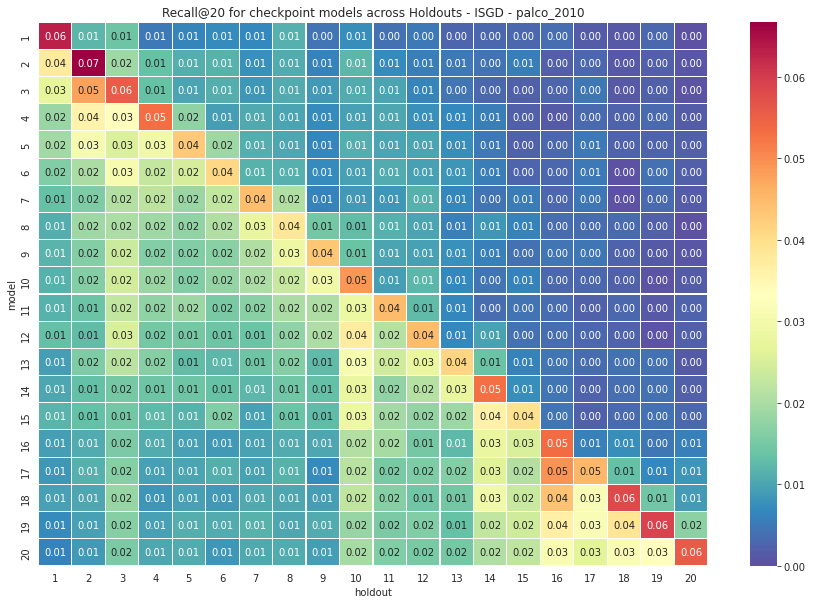

In [10]:
plt.figure(figsize=(15, 10))
x_t = np.arange(0,rm3.shape[0])
labels=[str(i+1) for i in x_t]
sns.heatmap(rm3.T, vmin=0, vmax=rm3.max().max(), annot=True, fmt='0.2f', linewidths=.1, cmap='Spectral_r', xticklabels=labels, yticklabels=labels)
plt.ylabel('model')
plt.xlabel('holdout')
plt.title('Recall@20 for checkpoint models across Holdouts - ISGD - palco_2010');
# plt.savefig('output/recall20 heatmap palco_2010');

___
TREINO COM PALCO_2010 - 20 CHECKPOINTS, 50 Recommendations

In [11]:
# O modelo não pode conter o stream, deve ser iniciado com uma lista vazia
# Se o stream for passado, ao excluir itens conhecidos o recall é sempre 0. Ao permitir a recomendação de itens já vistos, o recall não é 0.
model = ISGD(empty_stream, num_factors, num_iter, learn_rate = learn_rate, u_regularization = regularization, i_regularization = regularization, random_seed = 10)

In [12]:
eval = EvaluateAndStore(model=model,data=stream,n_holdouts=20, metrics = ["Recall@N"], N_recommendations=50)

In [13]:
results=eval.EvaluateAndStore(start_eval=0, count=stream.size, store_only=True)

A seguir calculamos uma matrix de resultados - todos os checkpoints de modelo avaliados em todos os holdouts.
Exclude known items está LIGADO.

In [14]:
eval.EvaluateHoldouts(exclude_known_items=True)

In [15]:
rm4 = eval.results_matrix
df4 = pd.DataFrame(rm4)
df4.to_csv('output/palco_2010-50_recs-results_matrix.csv', index=False)

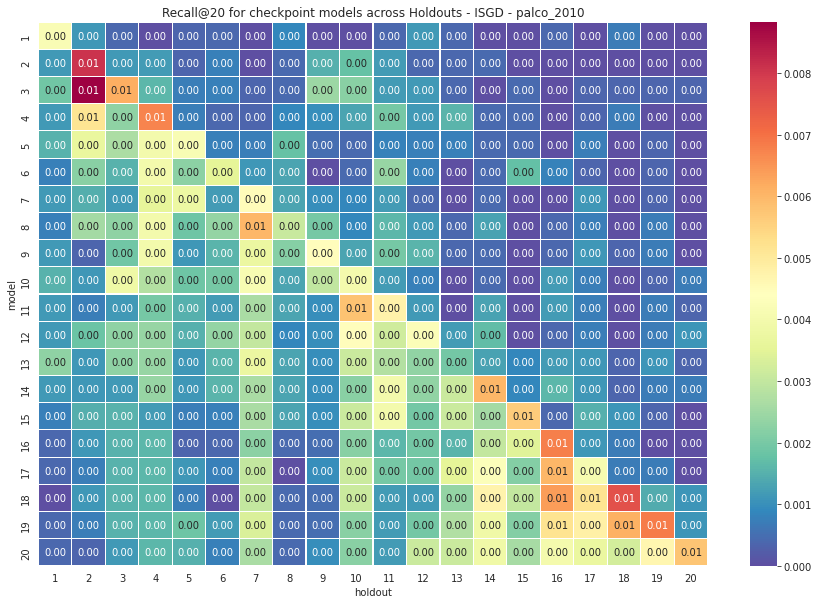

In [17]:
plt.figure(figsize=(15, 10))
x_t = np.arange(0,rm4.shape[0])
labels=[str(i+1) for i in x_t]
sns.heatmap(rm4.T, vmin=0, vmax=rm4.max().max(), annot=True, fmt='0.2f', linewidths=.1, cmap='Spectral_r', xticklabels=labels, yticklabels=labels)
plt.ylabel('model')
plt.xlabel('holdout')
plt.title('Recall@20 for checkpoint models across Holdouts - ISGD - palco_2010');
# plt.savefig('output/recall20 heatmap palco_2010');